## Logistic Regression
In this notebook we build a logistic regression model with loss function described in the lecture with  $y\in\{+1,-1\}$

In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import scipy.io as sio
data = sio.loadmat('spamData.mat')

In [2]:
def logreg_loss(w, X, y):
    [m,n]=X.shape
    loss = np.sum(np.log(np.exp(- np.dot(X,w)*y)+1))/m
    return loss

In [3]:
def logreg_grad(w, X, y):
    [m,n]=X.shape
    numerator = X*y
    denominator = np.exp(np.dot(X,w)*y)+1
    #print(denominator)
    grad = - np.sum(numerator/denominator, axis = 0)/m
    grad.reshape((n,1))
    return grad.reshape((n,1))

In [4]:
def sigmoid(z):
    return 1.0/(1+np.exp(-z))

In [5]:
def predict(X, w):
    z = np.dot(X, w)
    return sigmoid(z)

In [6]:
def accuracy(predicted_result, actual_result):
    diff = predicted_result - actual_result
    return 1.0 - (float(np.count_nonzero(diff)) / len(diff))

In [7]:
def classify(predictions):
    return np.vectorize(lambda prob: 1 if prob >= .5 else -1)(predictions)

In [8]:
def misclassification(w, X, y):
    [m,n]=X.shape
    prediction = predict(X, w)
    results = classify(prediction)
    return 1 - accuracy(results, y)

In [9]:
def grad_descent(Xtrain, ytrain, Xtest, ytest, T, eta):
    [m,n] =Xtrain.shape
    w =np.zeros((n,1))
    mis_train =[]
    mis_test =[]
    for t in range(T):
        grad = logreg_grad(w, Xtrain, ytrain)
        #print(grad)
        w = w - eta*grad
        if (t%10 == 0):
            mis_train.append(misclassification(w, Xtrain, ytrain))
            mis_test.append(misclassification(w, Xtest, ytest))
    return mis_train, mis_test

In [10]:
def main():
    T =1000
    eta =0.1
    Xtrain = data['Xtrain']
    ytrain = data['ytrain']
    Xtest = data['Xtest']
    ytest = data['ytest']
    Xtrain = np.log(Xtrain +0.1)
    Xtest = np.log(Xtest +0.1)
    [mtrain, n] = Xtrain.shape
    Xtrain = np.insert(Xtrain,[0], np.ones((mtrain,1)),axis = 1)
    ytrain = np.int8(ytrain)*2-1
    print(ytrain)
    [mtest, n]= Xtest.shape
    Xtest = np.insert(Xtest,[0], np.ones((mtest,1)),axis = 1)
    ytest = np.int8(ytest)*2-1
    mis_train,mis_test = grad_descent(Xtrain, ytrain, Xtest, ytest, T, eta)
    %matplotlib inline
    fig=plt.figure()
    plt.plot(mis_train, label='training misclassification rate')
    plt.plot(mis_test, label='test misclassification rate')
    plt.legend()
    plt.show()

[[ 1]
 [ 1]
 [ 1]
 ...
 [-1]
 [-1]
 [-1]]


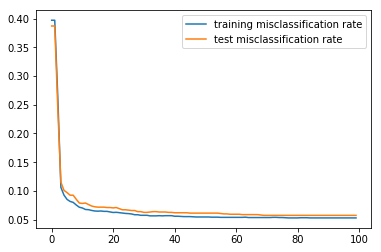

In [11]:
if __name__ == "__main__":
    main()